In [1]:
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from utils.experiments import *
from config import FIGURE_DIR
from config import TABLE_DIR

In [2]:
all_results = []

Text(0.5, 1.0, 'p=1, always-stay tie-breaking')

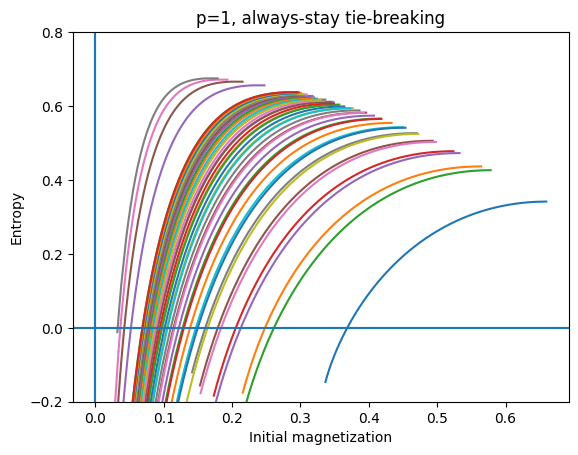

In [3]:
p = 1
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

df = pd.DataFrame(res)
df = df[df.converged]
df =df[df.d>2]
df=df[df.p==1]
for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    #plt.scatter(f.mag_init,f.entropy,marker='.',c=f.converged)
    
plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    plt.plot(f.mag_init,f.entropy,label=d)

plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)
plt.xlabel('Initial magnetization')
plt.ylabel('Entropy')
#plt.legend(title='d')
plt.title(f'p={p}, always-stay tie-breaking')

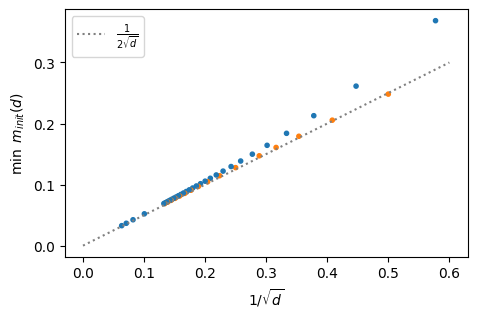

In [4]:
fig = plt.figure(figsize=(5.2,5.2/1.618))

xs = []
ys = []

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    
    x = f.mag_init
    y = f.entropy
    
    y_at_0 = np.interp(0, y, x)
    if (x < 0.0).sum() > 0:
        x_at_0 = np.interp(0, x, y)
    else: 
        x_at_0 = np.nan
    
    all_results.append({'p':p,'d':d,"m":y_at_0, "entropy": x_at_0})
    
    xs.append(d)
    ys.append(y_at_0)
c = [('tab:orange' if v % 2 == 0 else 'tab:blue') for v in np.array(xs)]
plt.scatter(1/np.sqrt(np.array(xs)),(np.array(ys)),marker='.',c=c)
plt.xlabel('$1/\sqrt{d}$')
x = np.linspace(0,0.6)
plt.plot(x,0.5*x,linestyle='dotted',color='grey',label=r'$\frac{1}{2\sqrt{d}}$')
plt.ylabel(r'${\min\,\,\, m_{init}}(d)$')
plt.legend()
plt.savefig(FIGURE_DIR / 'BDCM-min_init-p=1-extrapolation.pdf',bbox_inches='tight')

In [5]:
import pandas as pd

# After the plotting code
data = pd.DataFrame({
    "d": xs,
    "min_m_init": ys
})

output_path =  "tables/rs_p=1_all.csv"
data.to_csv(output_path, index=False)

Text(0.5, 1.0, 'p=2, always-stay tie-breaking')

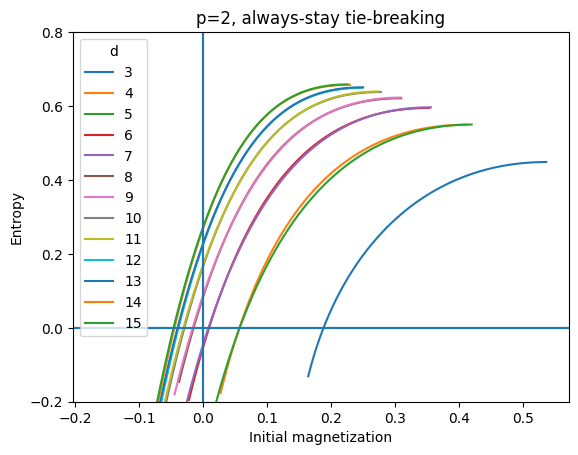

In [6]:
p = 2
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

df = pd.DataFrame(res)
df = df[df.d <= 15]
df = df[df.converged]
df =df[df.d>2]
for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    #plt.scatter(f.mag_init,f.entropy,marker='.',c=f.converged)
    
plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    plt.plot(f.mag_init,f.entropy,label=d)

plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)
plt.xlabel('Initial magnetization')
plt.ylabel('Entropy')
plt.legend(title='d')
plt.title(f'p={p}, always-stay tie-breaking')



In [7]:
xs = []
ys = []

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    
    x = f.mag_init
    y = f.entropy
    
    y_at_0 = np.interp(0, y, x)
    if (x < 0.0).sum() > 0:
        x_at_0 = np.interp(0, x, y)
    else: 
        x_at_0 = np.nan
    all_results.append({'p':p,'d':d,"m":y_at_0, "entropy": x_at_0})

/tmp/ipykernel_315791/1609544457.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df =df[df.d>2][df.d< 10]


Text(0.5, 1.0, 'p=3, always-stay tie-breaking')

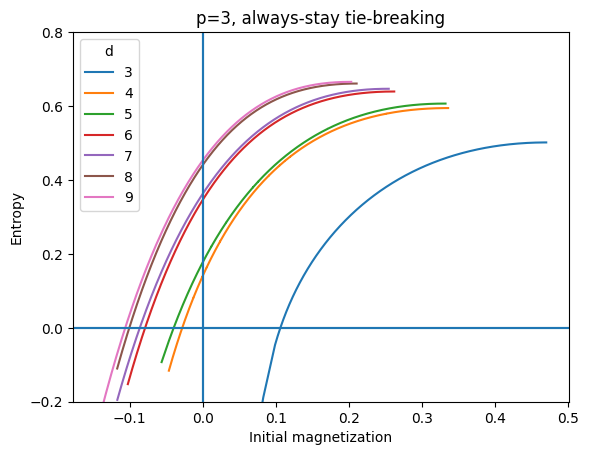

In [8]:
p = 3
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

df = pd.DataFrame(res)
df = df[df.converged]
df =df[df.d>2][df.d< 10]
df = df[df.mag_init_temp < 12]
for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    #plt.scatter(f.mag_init,f.entropy,marker='.',c=f.converged)
    
plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    plt.plot(f.mag_init,f.entropy,label=d)

plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)
plt.xlabel('Initial magnetization')
plt.ylabel('Entropy')
plt.legend(title='d')
plt.title(f'p={p}, always-stay tie-breaking')

In [9]:
xs = []
ys = []

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    
    x = f.mag_init
    y = f.entropy
    if (x < 0.0).sum() > 0:
        x_at_0 = np.interp(0, x, y)
    else: 
        x_at_0 = np.nan
    
    y_at_0 = np.interp(0, y, x)
    
    all_results.append({'p':p,'d':d,"m":y_at_0, "entropy": x_at_0})
    
    xs.append(d)
    ys.append(y_at_0)

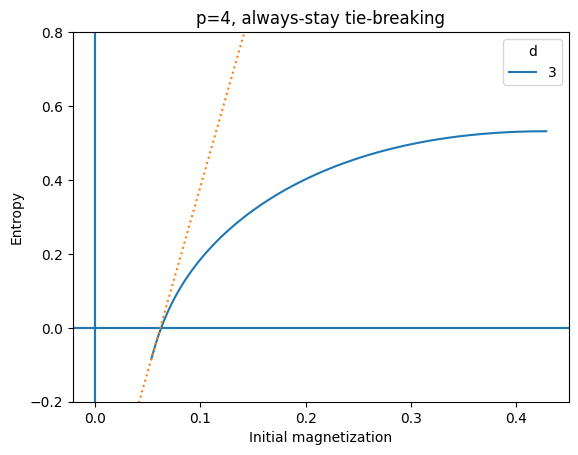

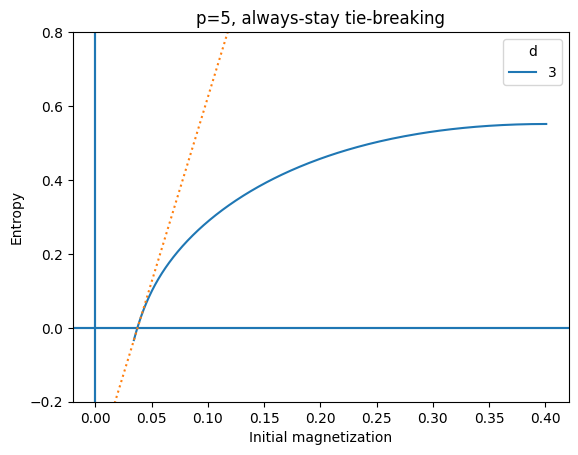

In [10]:
for p in [4,5]:
    res = []
    for p in Path(f'results/rs_p={p}').glob('*'):
        a = load_pickle(p)
        res.append(a)

    df = pd.DataFrame(res)
    df =df[df.d == 3]
    df = df[df.mag_init_temp < 10]

    for (p, d), g in df.groupby(['p','d']):
        f = g.sort_values('mag_init')
        #plt.scatter(f.mag_init,f.entropy,marker='.',c=f.converged)
        
    plt.axhline(0.0)
    plt.axvline(0)
    plt.ylim(-0.2,0.8)

    for (p, d), g in df.groupby(['p','d']):
        f = g.sort_values('mag_init')
        plt.plot(f.mag_init,f.entropy,label=d)

    plt.axhline(0.0)
    plt.axvline(0)
    plt.ylim(-0.2,0.8)
    plt.xlabel('Initial magnetization')
    plt.ylabel('Entropy')
    plt.legend(title='d')
    plt.title(f'p={p}, always-stay tie-breaking')

    for (p, d), g in df.groupby(['p','d']):
        f = g.sort_values('mag_init')
        
        x = f.mag_init
        y = f.entropy
        
        
        y_at_0 = np.interp(0, y, x)
        if (x < 0.0).sum() > 0:
            x_at_0 = np.interp(0, x, y)
        else: 
            x_at_0 = np.nan
        
        a = f.entropy.min()
        b = f.mag_init.min()
        c = f.mag_init_temp.max()
        all_results.append({'p':p,'d':d,"m":y_at_0, "entropy": x_at_0})
        
        func = lambda x: x*c+(a-(b*c))
        
        x = np.linspace(0,0.35,100)
        y = func(x)
        plt.plot(x,y,linestyle='dotted')
        
            
    plt.show()

1200
582
0.5650122419198293
0.0
9.69140950792327
d=3, entropy=0, mag_init=0.021518322788905756


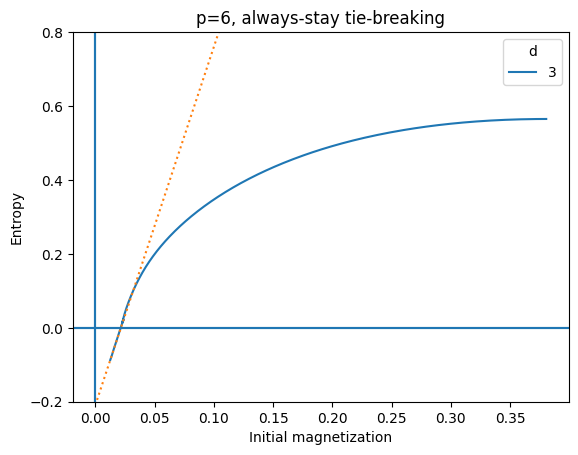

In [11]:
p = 6
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

df = pd.DataFrame(res)
print(len(df))
df = df[df.mag_init_temp < 9.7]
print(len(df))

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    #plt.scatter(f.mag_init,f.entropy,marker='.',c=f.converged)
    
plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    plt.plot(f.mag_init,f.entropy,label=d)
    
    print(f.entropy.values[-1])
    print(f.mag_init_temp.values[-1])
    

plt.axhline(0.0)
plt.axvline(0)
plt.ylim(-0.2,0.8)
plt.xlabel('Initial magnetization')
plt.ylabel('Entropy')
plt.legend(title='d')
plt.title(f'p={p}, always-stay tie-breaking')

for (p, d), g in df.groupby(['p','d']):
    f = g.sort_values('mag_init')
    
    x = f.mag_init
    y = f.entropy
    
    
    y_at_0 = np.interp(0, y, x)
    
    a = f.entropy.min()
    b = f.mag_init.min()
    c = f.mag_init_temp.max()
    
    print(c)
    
    func = lambda x: x*c+(a-(b*c))
    
    x = np.linspace(0,0.35,100)
    y = func(x)
    plt.plot(x,y,linestyle='dotted')
    
    print(f"d={d}, entropy=0, mag_init={y_at_0}")
    
    if (x < 0.0).sum() > 0:
        x_at_0 = np.interp(0, x, y)
    else: 
        x_at_0 = np.nan
    
    all_results.append({'p':p,'d':d,"m":y_at_0, "entropy": x_at_0})

In [12]:
df=pd.DataFrame(all_results)

In [13]:
df=pd.DataFrame(all_results)
allowed_ps = [1,2,3]
df = df[df.p.isin(allowed_ps)]
allowed_ds = [3,4,5,6,7,8]
df = df[df.d.isin(allowed_ds)]
df['$m_{init}$'] = df.m.apply(lambda x: (r'$\phantom'+f'{{-}}{x:.3f}$') if x > 0 else (r'$\mathbf'+f'{{{x:.3f}}}$'))
df['$d$'] = df.d.apply(lambda x: f'${int(x)}$')
df['$p$'] = df.p.apply(lambda x: f'${int(x)}$')
pv = pd.pivot_table(df[['$p$','$d$','$m_{init}$']],values='$m_{init}$',index='$d$',columns='$p$',aggfunc='first',fill_value='')
idx = np.argsort([int(a.replace('$',"")) for a in list(pv.index)])
pv.iloc[idx].to_latex(TABLE_DIR / 'bdcm_rs_results.tex')

In [14]:
df=pd.DataFrame(all_results)
allowed_ps = [2,3]
df = df[df.p.isin(allowed_ps)]
allowed_ds = [3,4,5,6,7,8,9]
df = df[df.d.isin(allowed_ds)]
def format(x):
    if np.isnan(x):
        return r''
    if x > 0:
        return (r'$\phantom'+f'{{-}}{x:.3f}$')
    else:
        return (r'$\mathbf'+f'{{{x:.3f}}}$')
    
df['entropy'] = df.entropy.apply(format)
df['$d$'] = df.d.apply(lambda x: f'${int(x)}$')
df['$p$'] = df.p.apply(lambda x: f'${int(x)}$')
pv = pd.pivot_table(df[['$p$','$d$','entropy']],values='entropy',index='$d$',columns='$p$',aggfunc='first',fill_value='')
idx = np.argsort([int(a.replace('$',"")) for a in list(pv.index)])
pv.iloc[idx].to_latex(TABLE_DIR / 'bdcm_rs_results_entropy.tex')

In [15]:
summary_df = pd.DataFrame(all_results)
summary_df.columns = ['p','d','m_min','entropy_at_zero']
summary_df.to_csv('tables/rs.csv', index=False)